In [15]:
# Importing Necessary Packages
#------------------------------------------------------------------------

# General
import warnings                                                             
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

# Statsmodels
import statsmodels.api as sm

# Scikit-Learn
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
# Loading in Relevant Data
#------------------------------------------------------------------------
diabetes = load_diabetes(scaled = True)     
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target

def MaleOrFemale(x):
    if x < 0: return 0
    return 1

df['sex'] = df['sex'].apply(lambda x: MaleOrFemale(x))
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,1,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,1,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,1,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,0,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


<hr>
<p style="text-align:center; font-size:x-large; color:black;">Training v.s Testing Data</p>
<hr>

Before learning about Cross-Validation, it's important to understand __training__ v.s __testing__ data.
- __Training Data__: This is the portion of the dataset that is used to train or build the machine learning model.
- __Testing Data__: This is remaining portion of the dataset that is used to evaluate the performance of the trained model.

<hr>
<p style="text-align:center; font-size:x-large; color:black;">Cross-Validation (CV)</p>
<hr>

The main goal of __Cross-Validation (CV)__ is to estimate how well a predictive model (such as a linear model) will perform on unseen data. This is done by partitioning the available data into various training and testing splits. Assessing our model's performance on varying testing/training splits will reduce the risk of overfitting or underfitting to a particular dataset. There are many ways to perform CV, but the 2 main methods I'll go over are...
- __K-Fold Cross Validation__
- __Leave-One-Out (LOO) CV__

<p style="text-align:left; font-size:x-large; color:black;"> K-Fold Cross-Validation </p>

To perform K-Fold Cross-Validation, we split up our dataset into K partitions (as evenly as we can). From here, we will use K-1 folds as training data, and use the remaining fold as our testing data and evaluate a performance. Since there a K-Folds, we are essentaily fitting K different models and obtaining K different performance metrics. We can then take the average of these K instances of our performance metric, and obtain a general assessment of our model's performance.

Wtihin K-Fold Cross-Validation, we can decided whether __Shuffle__ the data before partitioning our data. To work on my visualization skills, I coded up a quick visualization of how shuffling (or not shuffling) affects how the K-Fold Cross Validation splits data into training and testing sets.

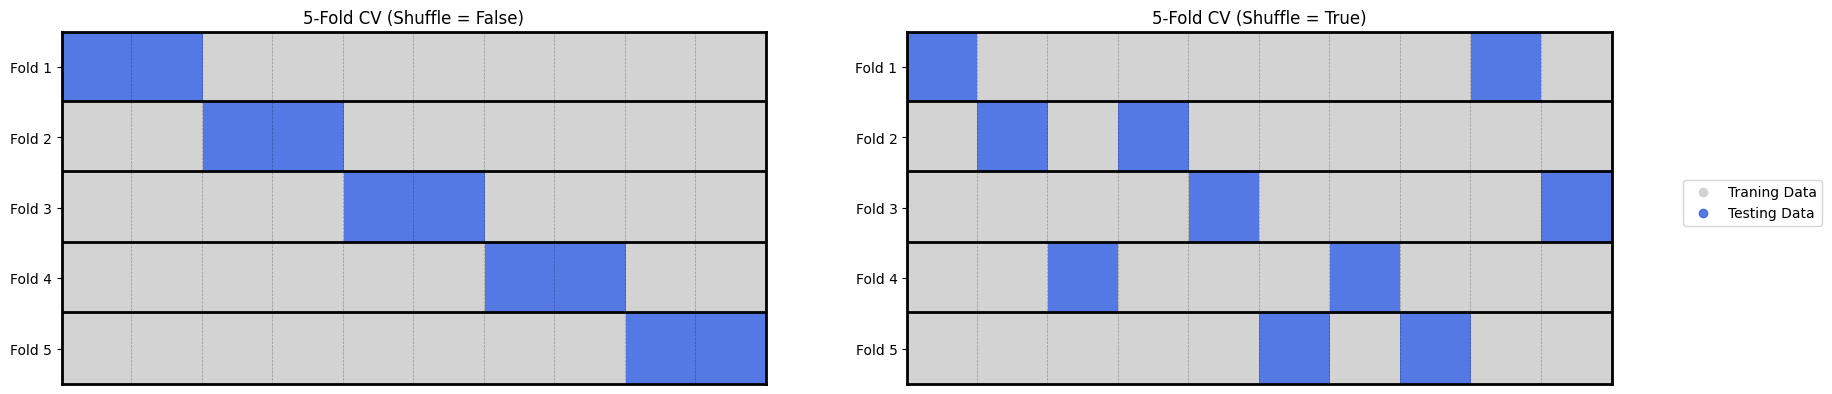

In [35]:
grid1 = [[1,1,0,0,0,0,0,0,0,0],
        [0,0,1,1,0,0,0,0,0,0],
        [0,0,0,0,1,1,0,0,0,0],
        [0,0,0,0,0,0,1,1,0,0],
        [0,0,0,0,0,0,0,0,1,1]]
grid2 = [[1,0,0,0,0,0,0,0,1,0],
        [0,1,0,1,0,0,0,0,0,0],
        [0,0,0,0,1,0,0,0,0,1],
        [0,0,1,0,0,0,1,0,0,0],
        [0,0,0,0,0,1,0,1,0,0]]

colors = ['lightgray', '#4169E1E6']
custom_cmap = LinearSegmentedColormap.from_list('KFCV', colors)

fig, axs = plt.subplots(1, 2, figsize=(20, 12))

ax1 = axs[0]
ax1.imshow(grid1, interpolation = 'None', cmap = custom_cmap)
ax1.set_title('5-Fold CV (Shuffle = False)')

ax2 = axs[1]
ax2.imshow(grid2, interpolation = 'None', cmap = custom_cmap)
ax2.set_title('5-Fold CV (Shuffle = True)')


hlines = np.arange(0.48, 4, 1)
vlines = np.arange(0.49, 10, 1)
plots = [ax1, ax2]
for plot in plots:
    
    fold_positions = range(5)
    fold_labels = [f'Fold {i+1}' for i in range(5)]
    plot.set_yticks(fold_positions)
    plot.set_yticklabels(fold_labels)

    for hline in hlines:
        plot.axhline(hline, color='black', linewidth = 2, linestyle = '-')

    for vline in vlines:
        plot.axvline(vline, color='black', linewidth = 0.5, linestyle = '--', alpha = 0.3)
        
    plot.spines[['top', 'left', 'bottom', 'right']].set_linewidth(2)
    plot.set_xticks([])
    

legend_labels = ['Traning Data', 'Testing Data']

# Add custom legend
for i, label in enumerate(legend_labels):
    plt.scatter([], [], color = colors[i], label = label)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.6)) 
plt.show()

Below is an example of the implementation of 5-Fold CV in Python. This comes from the __sklearn.model_selection__ library.

In [6]:
KFCV = KFold(n_splits = 5, shuffle = False)
KFCV_with_shuffle = KFold(n_splits = 5, shuffle = True)

To ensure that the data is actually splitting the dataset into roughly equal parts, I've put the follow code below...

In [10]:
print('5-fold CV - Shuffle = False')
for train_index, test_index in KFCV.split(df):
    print(f'Traning Data Size: {len(train_index)}, Testing Data Size: {len(test_index)}') 

print('\n5-fold CV - Shuffle = False')
for train_index, test_index in KFCV_with_shuffle.split(df):
    print(f'Traning Data Size: {len(train_index)}, Testing Data Size: {len(test_index)}') 

5-fold CV - Shuffle = False
Traning Data Size: 353, Testing Data Size: 89
Traning Data Size: 353, Testing Data Size: 89
Traning Data Size: 354, Testing Data Size: 88
Traning Data Size: 354, Testing Data Size: 88
Traning Data Size: 354, Testing Data Size: 88

5-fold CV - Shuffle = False
Traning Data Size: 353, Testing Data Size: 89
Traning Data Size: 353, Testing Data Size: 89
Traning Data Size: 354, Testing Data Size: 88
Traning Data Size: 354, Testing Data Size: 88
Traning Data Size: 354, Testing Data Size: 88


Ultimately, with this K-Fold Cross-Validation, I want to measure a performance metric of some kind, for example MSE. Scikit-Learn provides an easy way to do this with __cross_val_score__. Here are the required parameters.
- __estimator__: The type of model that you want to run
- __X__: The data that will be used as the predictor variables
- __y__: The target/response variable that we want to predict
- __cv__: The Cross-Validation method that we want to perform
- __scoring__: The scoring method that we want to use within each fold  

This will return an array of performance metrics for __each__ train/test split. So if I performed 5-Fold CV, cross_val_score() would return 5 values. Here's an example below...

In [12]:
first_score = cross_val_score(estimator = LinearRegression(), 
                            X = df[['bmi', 's5']], 
                            y = df['target'],
                            cv = KFCV, 
                            scoring = 'neg_mean_squared_error')

second_score = cross_val_score(estimator = LinearRegression(), 
                            X = df[['bmi', 's5']], 
                            y = df['target'],
                            cv = KFCV_with_shuffle, 
                            scoring = 'neg_mean_squared_error')

results = pd.DataFrame({'MSE (Shuffle = False)' : -first_score, 
                        'MSE (Shuffle = True)' : -second_score})
results.index = [f'Fold {i+1}' for i in range(5)]
results

,MSE (Shuffle = False),MSE (Shuffle = True)
Fold 1,3010.965241,3193.812589
Fold 2,3274.356618,3036.014167
Fold 3,3287.316414,4235.613677
Fold 4,3199.006005,2644.975544
Fold 5,3329.187012,3336.217494


From here, we can just calculate the means of these scores to get a general idea of the performance of our model. I'll run this process 10 times to highlight the differences in shuffle = True/False.

In [14]:
results = pd.DataFrame(columns = ['Average MSE (Shuffle = False)', 'Average MSE (Shuffle = True)'])

for i in range(10):

    first_score = cross_val_score(estimator = LinearRegression(), 
                            X = df[['bmi', 's5']], 
                            y = df['target'],
                            cv = KFCV, 
                            scoring = 'neg_mean_squared_error')

    second_score = cross_val_score(estimator = LinearRegression(), 
                            X = df[['bmi', 's5']], 
                            y = df['target'],
                            cv = KFCV_with_shuffle, 
                            scoring = 'neg_mean_squared_error') 
    
    results.loc[len(results)] = [-np.mean(first_score), -np.mean(second_score)]

results

,Average MSE (Shuffle = True),Average MSE (Shuffle = False)
0,3220.166258,3249.440944
1,3220.166258,3301.339264
2,3220.166258,3235.169573
3,3220.166258,3233.413563
4,3220.166258,3238.021635
5,3220.166258,3222.483494
6,3220.166258,3223.874006
7,3220.166258,3255.308920
8,3220.166258,3232.311293
9,3220.166258,3341.888492


Without shuffling, we will always obtain the same results.

<p style="text-align:left; font-size:x-large; color:black;"> Leave-One-Out (LOO) Cross-Validation </p>

Leave-One-Out CV is the same thing as n-Fold CV, where n is the number of data points that you have. Within each fold, a singular data point is treated as the testing set, while the rest of the data is used for training. Through this process, we willl have n instances of our performance metrics. Just like K-Fold CV, we can then average these instances to get an overall assessment of the model's performance. Again, I decided to code up my own visualization of LOO CV below.

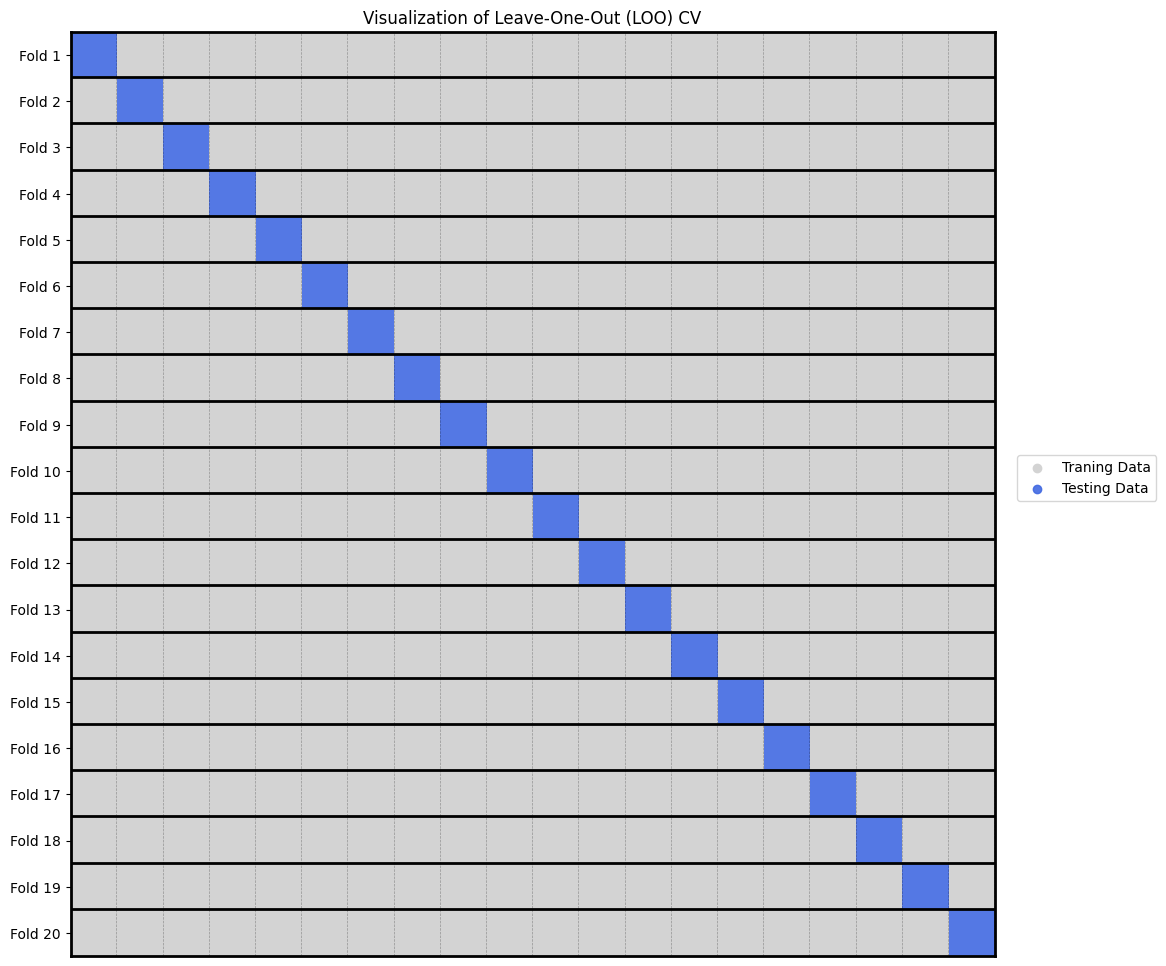

In [38]:
grid3 = np.eye(20)

colors = ['lightgray', '#4169E1E6']
custom_cmap = LinearSegmentedColormap.from_list('KFCV', colors)

fig = plt.figure(figsize = (12,12))
plt.imshow(grid3, interpolation = 'None', cmap = custom_cmap)

hlines = np.arange(0.48, 19, 1)
for hline in hlines:
    plt.axhline(hline, color='black', linewidth = 2, linestyle = '-')

vlines = np.arange(0.49, 20, 1)
for vline in vlines:
    plt.axvline(vline, color='black', linewidth = 0.5, linestyle = '--', alpha = 0.3)

plt.gca().spines[['top', 'left', 'bottom', 'right']].set_linewidth(2)
plt.xticks([])
plt.yticks(range(20))
plt.gca().set_yticklabels([f'Fold {i+1}' for i in range(20)])
plt.title('Visualization of Leave-One-Out (LOO) CV')

legend_labels = ['Traning Data', 'Testing Data']

# Add custom legend
for i, label in enumerate(legend_labels):
    plt.scatter([], [], color = colors[i], label = label)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.55)) 

plt.show()

Below is an example of implementing Leave-One-Out CV in Python. Note that this will always yield the same result since we are obtaining a performance metric for each and every data point.

In [41]:
LOO = LeaveOneOut()
third_score = cross_val_score(estimator = LinearRegression(), 
                            X = df[['bmi', 's5']], 
                            y = df['target'],
                            cv = LOO, 
                            scoring = 'neg_mean_squared_error')
print(f'Average MSE by LOOCV: {-np.mean(third_score)}')

Average MSE by LOOCV: 3247.9789202857637


<p style="text-align:left; font-size:x-large; color:black;"> Nested Cross-Vaildation </p>

Nested Cross-Validation is fequently employed in linear models when it comes to __hyperparameter tuning__ of Lasso/Ridge Regression, which I'll show in another Jupyter Notebook.In a K-Fold or Leave-One-Out CV, data is simulataneously used as training AND testing data. Because of this, our 'ideal' model tends to overfit the test data, and the estimation leads to an optimistic bias. This is called __leakage__. <br>

Nested Cross-Validation eliminates leakage by implementing 2 layers of CV (either 2 K-Folds, 2 Leave-One-Outs, or 1 of each). This way, we can tune a hyperparameter with the inner layer of training-testing data, and validate the resulting model's performance on the outer cross-validation's testing data, which has data that was not used to tune the hyperparameter. This gives us a better understanding of a model's general performance. <br> 

In the __Regularization and Hyperparameter Tuning__ notebook, I provide examples of using Nested CV to find optimal hyperparameters (&lambda;), and then utilizing K-Fold CV to test the models' general performance. For now, Here is an image I found online that depicts the process of Nested CV (still have to work on my visualization skills).

![Plot](NestedCV.png)